In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Median Yearly Salary vs. Job Count

In [8]:
job_stats = df.groupby('job_title_short').agg(
    job_count = ('job_title_short', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

job_stats = job_stats.sort_values(by='job_count', ascending=False)

job_stats

,job_count,median_salary
job_title_short,,
Data Analyst,196075,90000.0
Data Engineer,186241,125000.0
Data Scientist,172286,127500.0
Business Analyst,49063,85000.0
Software Engineer,44929,99150.0
Senior Data Engineer,44563,147500.0
Senior Data Scientist,36957,155500.0
Senior Data Analyst,29216,111175.0
Machine Learning Engineer,14080,106415.0


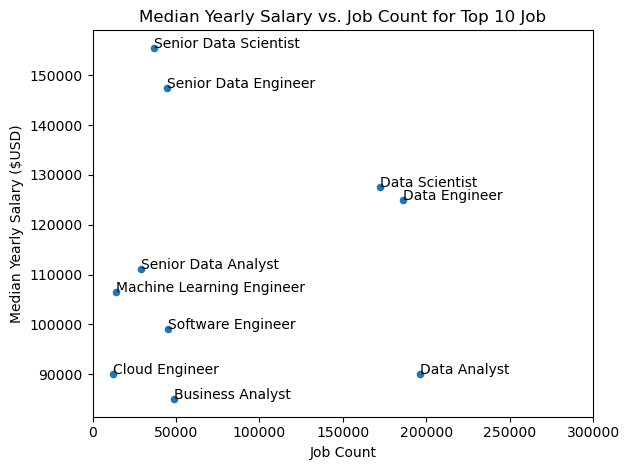

In [13]:
job_stats.plot(kind='scatter', x='job_count', y='median_salary')

for i, job in enumerate(job_stats.index):
    plt.text(job_stats['job_count'].iloc[i], job_stats['median_salary'].iloc[i], job)

plt.title('Median Yearly Salary vs. Job Count for Top 10 Job')
plt.xlabel('Job Count')
plt.ylabel('Median Yearly Salary ($USD)')
plt.xlim(0, 300000)
plt.tight_layout()
plt.show()